# Advanced Topics in Data Mining and Knowledge Discovery 
## Assignment 1 
## Clustering  
**Cluster analysis** or clustering is the task of grouping a set of objects in such 
a way that objects in the same group (called a cluster) are more similar (in 
some sense) to each other than to those in other groups (clusters). [Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
### DBSCAN
**DBSCAN** (Density-based spatial clustering of applications with noise) is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature. [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN)

For some intuition on clustering visit the following website:
https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

### K-means 
K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.  [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

## Questions

**1.** What are the advantages of using DBSCAN as compared to other clustering methods?

The advantages of DBSCAN to other clustering methods are -
    1. He can identify any number of groups ( many groups or few)
    2. He can identify any kind of shape ( not only specific type of shape)
    3. He can identify clusters and ignore noise and outliers points.

**2.** What points are considered ***core points***? And what points are considered ***outliers***?

Core points are points thats in their "neighborhood" (N distance from them. the paramater N of the algorithm) there are more mintpts points ( Density parameter/minmum number of points in a cluster).
Outliers points are points that are not core points and not border points = Outliers points are points that in their "neighborhood" there are less than minpts points and they don't exists in anyone else neighborhood.

**3.** For the following graph and minPts values:

> **a.** Mark the clusters that DBSCAN will generate (Specify the letters, e.g. cluster 1: A,B clster 2: C, G, H)


> **b.** Specify for each point if it is a core point.


> **c.** How does the ε value affect the clustering? 

**minPts = 3, 4, 5**



![dbscan_example](http://i68.tinypic.com/k1t8xt.png) 



Answer to question number 3
a.

minpts =3.   cluster 1: A,B,C,D. cluster 2: H, E ,G
minpts = 4.  cluster 1: A,B,C,D
minpts = 5. no clusters.

b. 

minpts = 3. core points: C,D,B,E
minpts = 4. core points: C
minpts = 5. core points: None.

c.
The variable epsilon affect on the clustering by determine the size of the "neighborhood". This means, the number of points in a cluster will be the number of points in a radius epsilon from a core point. If the epsilon will be bigger than probably more points will get to the cluster and if it will be smaller than less points will be in the clusters. (obviously the algorithm will have to relate to minpts too).


## Code

In [3]:
from collections import Counter

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/m-braverman/ta_dm_course_data/master/x_y_terrorism_data.csv')


**4**.  Plot the data using a scatterplot. 

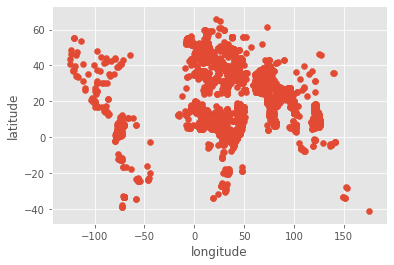

In [5]:

ax1 = df.plot.scatter('longitude','latitude')
plt.scatter(df.longitude,df.latitude)


5. a. Scale the data,  and plot the result. 

    b. Explain why it is a recommended step for DBSCAN.
   

Standardizing data is recommended because otherwise the range of values in each feature will act as a weight when determining how to cluster data, which is typically undesired.


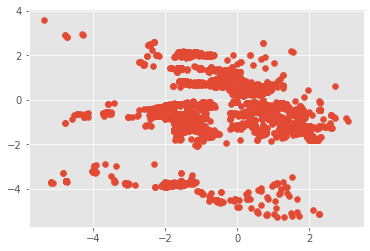

In [12]:

df_std = StandardScaler().fit_transform(df)
plt.scatter(df_std[:,0], df_std[:,1])

[ Type you answer here ]

6. Run the DBSCAN algorithm, and explain how you chose Epsilon (ε) and minPts parameters. 

In [ ]:
clustering = DBSCAN(eps=0.25, min_samples=6).fit(df_std)

minpts -
I run some tests with different minpts parameters and in the end i choosed minpts that is not too small because than the result will has too many clusters that was created by noise points and not too big because that all my clusters will be unioned to few clusters. After some runs i choosed - mintpts =6.
epsilon - 
I run some tests and watched how many clusters i have after each run and the size of each cluster. After i saw that the algorithm return clusters than seems clustered correct i choose the number. 

7. How many clusters did you get?

I got 21 clusters.

7. Plot the result.

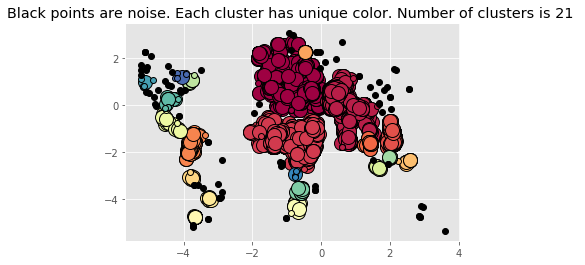

In [75]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Black removed and is used for noise instead.
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_std[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'Black points are noise. Each cluster has unique color. Number of clusters is {n_clusters} ')
plt.show()

[ Type you answer here ]

# Kmeans

8. Choose the number of clusters to use with Kmeans and explain you choice.

I choosed the number 5 because after i looked at the data i saw that it can be cluster nicely to 5 clusters.Also i run knn histogram and tried to find the "elbow" (The code that in comments in the next cell do that).  Also i run some tests with defferent K numbers and found that 5 is the best number in this case.

9. Run the K-means algorithm with your chosen number of clusters and plot the result.

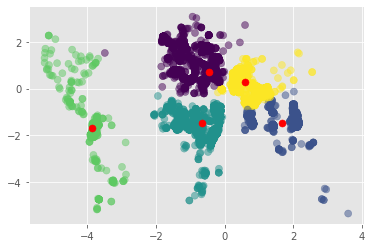

In [88]:
# from sklearn.neighbors import NearestNeighbors

# ns = 4
# nbrs = NearestNeighbors(n_neighbors=ns).fit(df_std)
# distances, indices = nbrs.kneighbors(df_std)
# distance_dec = sorted(distances[:,ns-1], reverse=True)

# plt.plot(list(range(1,len(df_std)+1)), distance_dec)


kmeans = KMeans(n_clusters=5).fit(df_std)

centroids = kmeans.cluster_centers_

plt.scatter(df_std[:, 1], df_std[:, 0], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=50)

# Conclusion

9. Which algorithm is a better fit for this data and why? 

For this data Kmeans is better algorithm - 
1. First of all because of the results we see after we run both of the algorithms. We can see the Kmeans gave us much more clear and correct clustering. 
2. Kmean is better for this data because this data has very few noise points. As we can see from the first plot view most of the points can be clustered to groups and very few are spin around alone in far places like noise points.